In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')
df = df.dropna()
print(df.shape)
print(list(df.columns))

(70000, 13)
['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Normalisation

In [117]:
from sklearn import preprocessing

x = df.values #returns a numpy array
x_scaled = StandardScaler().fit_transform(x)
df = pd.DataFrame(x_scaled)

TypeError: 'MinMaxScaler' object is not callable

In [109]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00000,0.588076,1.0,0.579487,0.273684,0.016079,0.013550,0.0,0.0,0.0,0.0,1.0,0.0
1,0.00001,0.730159,0.0,0.517949,0.394737,0.017934,0.014453,1.0,0.0,0.0,0.0,1.0,1.0
2,0.00002,0.624003,0.0,0.564103,0.284211,0.017316,0.012647,1.0,0.0,0.0,0.0,0.0,1.0
3,0.00003,0.528455,1.0,0.584615,0.378947,0.018553,0.015357,0.0,0.0,0.0,0.0,1.0,1.0
4,0.00004,0.516918,0.0,0.517949,0.242105,0.015461,0.011743,0.0,0.0,0.0,0.0,0.0,0.0


# Data exploration

In [111]:
df['cardio'].value_counts()

KeyError: 'cardio'

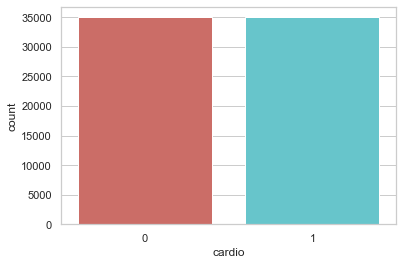

<Figure size 432x288 with 0 Axes>

In [6]:
sns.countplot(x='cardio', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [7]:
count_no_sub = len(df[df['cardio']==0])
count_sub = len(df[df['cardio']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of NEGATIVE cardiovascular risk is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of POSITIVE cardiovascular risk is", pct_of_sub*100)

percentage of NEGATIVE cardiovascular risk is 50.029999999999994
percentage of POSITIVE cardiovascular risk is 49.97


In [8]:
df.groupby('cardio').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
cardio,,,,,,,,,,,,
0,49862.869107,18881.623711,1.345707,164.448017,71.592150,120.432598,84.251763,1.216527,1.175380,0.092516,0.055424,0.817881
1,50082.102233,20056.813031,1.353441,164.270334,76.822368,137.212042,109.023929,1.517396,1.277595,0.083736,0.052117,0.789559


In [9]:
df.groupby('gender').mean()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
gender,,,,,,,,,,,,
1,49898.345267,19510.124577,161.355612,72.565605,128.139249,94.522776,1.384735,1.235054,0.017856,0.025500,0.802021,0.496727
2,50110.246547,19392.097875,169.947895,77.257307,130.078872,100.551982,1.333633,1.210462,0.218880,0.106375,0.806906,0.505231


In [10]:
df.groupby('cholesterol').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,gluc,smoke,alco,active,cardio
cholesterol,,,,,,,,,,,,
1,49883.917381,19283.308084,1.359168,164.590283,73.053862,126.608705,93.733741,1.099093,0.085196,0.048067,0.802367,0.440107
2,50064.959682,19604.875799,1.329459,163.880406,76.666464,134.788250,105.838098,1.335218,0.105666,0.076134,0.799037,0.602157
3,50437.649516,20512.962311,1.311059,163.425490,78.773085,136.092239,104.542400,1.924870,0.086412,0.064344,0.818125,0.765435


In [11]:
df.groupby('smoke').mean()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,alco,active,cardio
smoke,,,,,,,,,,,,
0,50005.59844,19505.400730,1.299447,163.879416,73.902352,128.861431,96.326550,1.364682,1.227303,0.029923,0.800536,0.502107
1,49629.11963,19090.836927,1.868212,169.323877,77.344351,128.360512,99.774518,1.389528,1.217701,0.300535,0.836764,0.474793


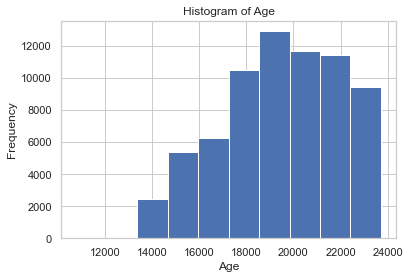

In [12]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

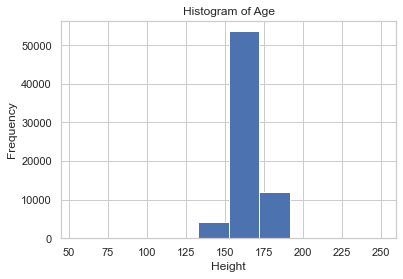

In [13]:
df.height.hist()
plt.title('Histogram of Age')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.savefig('hist_age')

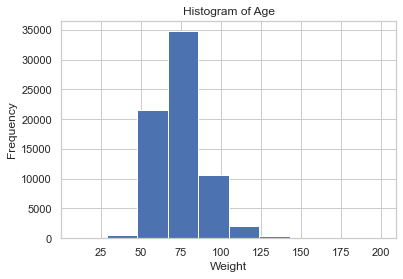

In [14]:
df.weight.hist()
plt.title('Histogram of Age')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.savefig('hist_age')

<AxesSubplot:>

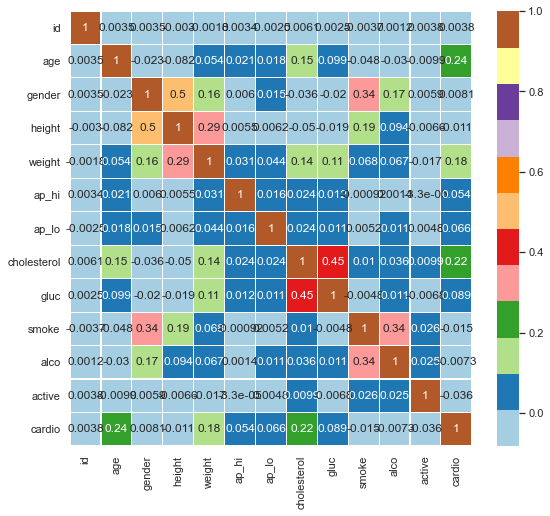

In [15]:
matrice_corr = df.corr()
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(matrice_corr, ax = ax, cmap ="Paired", linewidths = 0.1, annot=True)

# Create dummy variables

In [16]:
cat_vars=['gluc', 'smoke', 'alco', 'active']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1=df.join(cat_list)
    data=data1
cat_vars=['gluc', 'smoke', 'alco', 'active']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [17]:
data_final=df[to_keep]
data_final.columns.values

array(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'cardio'], dtype=object)

# Oversampling with SMOTE

In [18]:
import imblearn
print(imblearn.__version__)

0.7.0


In [29]:
X = data_final.loc[:, data_final.columns != 'cardio']
y = data_final.loc[:, data_final.columns == 'cardio']

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['cardio'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no cardiovascular risk data in oversampled data",len(os_data_y[os_data_y['cardio']==0]))
print("Number of cardiovascular risk",len(os_data_y[os_data_y['cardio']==1]))
print("Proportion of no cardiovascular risk data in oversampled data is ",len(os_data_y[os_data_y['cardio']==0])/len(os_data_X))
print("Proportion of cardiovascular risk data in oversampled data is ",len(os_data_y[os_data_y['cardio']==1])/len(os_data_X))

length of oversampled data is  49036
Number of no cardiovascular risk data in oversampled data 24518
Number of cardiovascular risk 24518
Proportion of no cardiovascular risk data in oversampled data is  0.5
Proportion of cardiovascular risk data in oversampled data is  0.5


# Recursive Feature Elimination

In [52]:
data_final_vars=data_final.columns.values.tolist()
y_bis =['cardio']
X_bis =[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

C:\Users\bbeau\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[False False False  True  True  True False  True]
[5 3 4 1 1 1 2 1]


# Implementing the model

In [53]:
X = data_final.loc[:, data_final.columns != 'cardio']
y = data_final.loc[:, data_final.columns == 'cardio']

In [73]:
import statsmodels.api as sm 

logit_model=sm.Logit(y,X)
result=logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.605468
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.126     
Dependent Variable: y                AIC:              84781.5372
Date:               2021-02-12 15:18 BIC:              84854.7872
No. Observations:   70000            Log-Likelihood:   -42383.   
Df Model:           7                LL-Null:          -48520.   
Df Residuals:       69992            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       -0.0000     0.0000    -2.3345   0.0196   -0.0000   -0.0000
x2        0.0001     0.0000    30.7699   0.0000    0.0001 

# Logistic Regression Model Fitting

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X = pd.DataFrame(data_final, columns=['age','weight','cholesterol'])
y = data_final.loc[:, data_final.columns == 'cardio']

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\bbeau\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [72]:
print(y_pred)

[0 0 0 ... 0 1 0]


In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[8686 1853]
 [6900 3561]]


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.82      0.66     10539
           1       0.66      0.34      0.45     10461

    accuracy                           0.58     21000
   macro avg       0.61      0.58      0.56     21000
weighted avg       0.61      0.58      0.56     21000



Confusion matrix for Logistic Regression
[[28855  6166]
 [22992 11987]]

Normalized confusion matrix for Logistic Regression
[[0.82393421 0.17606579]
 [0.65730867 0.34269133]]



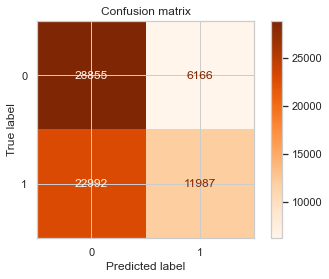

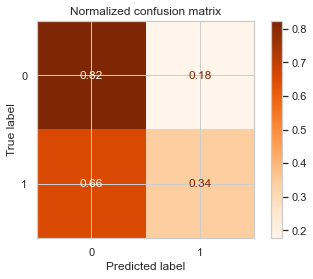

In [96]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
titles_options = [("Confusion matrix", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(logreg, X, y,
                                 cmap=plt.cm.Oranges,
                                 normalize=normalize)
    disp.ax_.set_title(title)


    print(title,'for Logistic Regression')
    print(disp.confusion_matrix)
    print()


In [105]:
X_t = np.array([53,85, 2])
X_t = X_t.reshape(1, -1)

In [106]:
logreg.predict(X_t) 

array([1], dtype=int64)